In [1]:
from __future__ import division
from sympy import symbols, Function, diff, solve, init_printing, latex, cos, acos, ln, sqrt, Rational, pi, Abs
init_printing(use_unicode=True)
f, g = symbols('f g', cls=Function)

ModuleNotFoundError: No module named 'sympy'

# Define Variables and Functionals

In [14]:
P, T, R, V_i_k, V_z_k, V_j_k, V_z, a_im, r, s, Sigma_n_i = symbols('P, T, R, V_i^k, V_z^k, V_j^k V_z a_im, r, s, Sigma^n_i=1')
a_j, a_z, a_i, b_j, b_z, b_i, x_i, x_j, x_z = symbols('a_j, a_z, a_i, b_j, b_z, b_i, x_i, x_j, x_z')
f, g_i_R_k, g_mix_R_k, a_mix, b_mix, V_mix_k = symbols('f, g_i^R\,k, g_mix^R\,k, a_mix, b_mix, V_mix^k', cls=Function)

In [39]:
x_j_func = 1 - x_z - Sigma_n_i * x_i # Eliminate non-independent variable
x_j_func

In [40]:
V_z_k

In [41]:
g_mix_R_k(x_z)

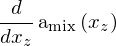

In [42]:
diff(a_mix(x_z), x_z)

In [43]:
ln(x_z)

# Gibbs Energy

## Ideal gas terms

In [44]:
idg_func = x_z * ln(x_z) + x_j * ln(x_j) + Sigma_n_i * x_i * ln(x_i)
idg_func = idg_func.subs(x_j, x_j_func )
idg_func

In [45]:
diff(idg_func, x_z)

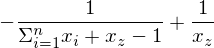

In [46]:
diff(idg_func, x_z, x_z) # Validated against hand calculations

## Pure component terms

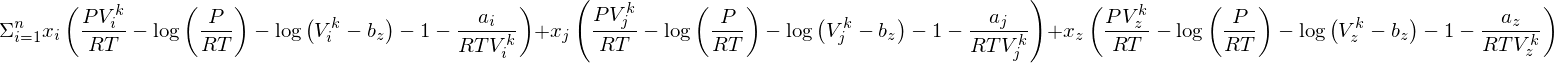

In [47]:
g_i_R_k_func = x_z * (P * V_z_k / (R * T) - 1 - ln(P / (R * T)) - ln(V_z_k - b_z) - a_z /(R * T * V_z_k) )
g_i_R_k_func+= x_j * (P * V_j_k / (R * T) - 1 - ln(P / (R * T)) - ln(V_j_k - b_z) - a_j /(R * T * V_j_k) )
g_i_R_k_func+= Sigma_n_i * x_i * (P * V_i_k / (R * T) - 1 - ln(P / (R * T)) - ln(V_i_k - b_z) - a_i /(R * T * V_i_k) )
g_i_R_k_func

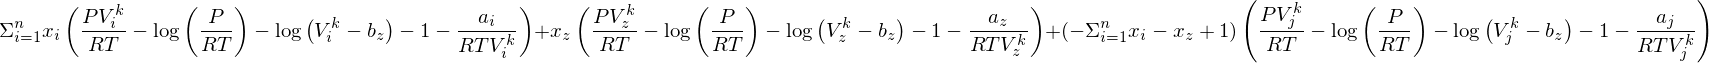

In [48]:
g_i_R_k_func = g_i_R_k_func.subs(x_j, x_j_func )
g_i_R_k_func

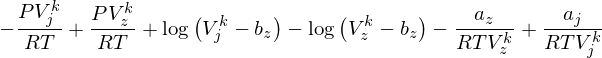

In [49]:
diff(g_i_R_k_func, x_z) # Validated against hand calculations

In [50]:
diff(g_i_R_k_func, x_z, x_z) # Validated against hand calculations

## Mixture Term

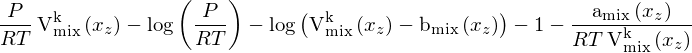

In [51]:
g_mix_R_k_func = P * V_mix_k(x_z) / (R * T) - 1 - ln(P / (R * T)) - ln(V_mix_k(x_z) - b_mix(x_z)) -  a_mix(x_z) /(R * T * V_mix_k(x_z))
g_mix_R_k_func

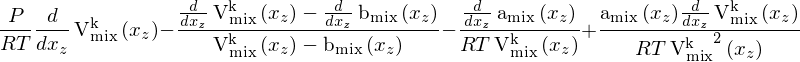

In [52]:
diff(g_mix_R_k_func, x_z) # Validated against hand calculations

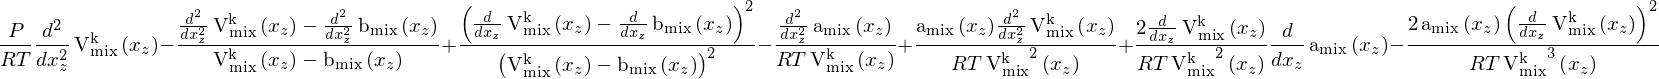

In [53]:
diff(g_mix_R_k_func, x_z, x_z) # TODO CHECK LATEX

# Differential Functionals

## a_mix

In [54]:
Sigma_n_i

## b_mix practice

In [55]:
b_j, b_z, b_i, x_i, x_z = symbols('b_j, b_z, b_i, x_i, x_z')

In [56]:
b_mix_func = x_z * b_z + (1 - x_z - Sigma_n_i * x_i) * b_j + Sigma_n_i * x_i * b_i
b_mix_func

In [57]:
diff(b_mix_func , x_z) # Validated against hand calculations

In [58]:
diff(b_mix_func , x_z, x_z) # Validated against hand calculations

# Volume Terms

######  (Here be Dragons)

In [62]:
C_1 = - ( (R * T / P) + b_mix(x_z))
C_2 = a_mix(x_z) / P
C_3 = - (a_mix(x_z) * b_mix(x_z)) / P

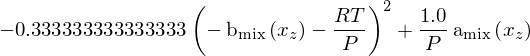

In [63]:
w = (3 * C_2 - C_1 **2) /3.0
w

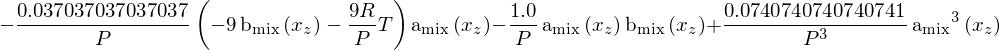

In [64]:
q = (27 * C_3 - 9 * C_1 * C_2 + 2 * C_2 **3) / 27.0
q

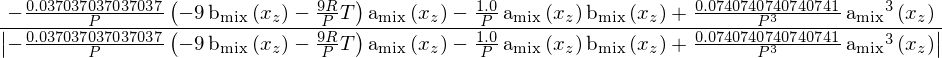

In [65]:
q_s = q /abs(q) # math.copysign
q_s

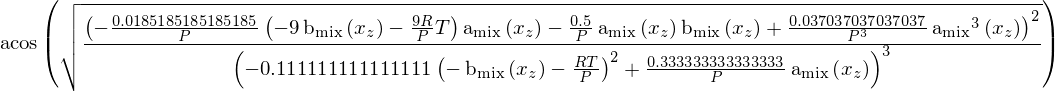

In [66]:
#from math import acos
phi = acos(sqrt(( ((q/2.0)**2)/(w/3.0)**3) ))
phi

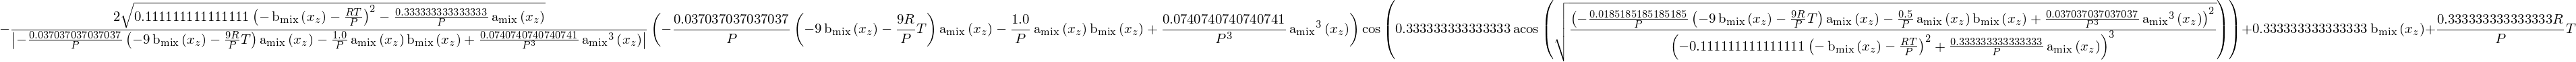

In [67]:
f_1 = - 2 * q_s * sqrt(- w / 3.0) * cos(phi/3.0) - C_1/3.0
f_1

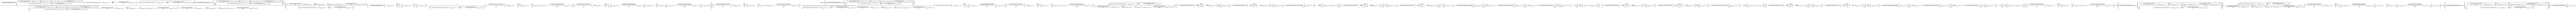

In [68]:
diff(f_1, x_z)

## Functional approach

######  # TO DO Group these functions into simpler expressions for final implementation

In [71]:
w, q, q_s, phi, C_1, C_2, C_3 = symbols('w, q, q_s, phi, C_1, C_2, C_3', cls=Function)

### $f_1$

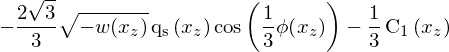

In [88]:
f_1 = - Rational(2) * q_s(x_z) * sqrt(- w(x_z) / Rational(3.0)) * cos(phi(x_z)/Rational(3.0)) - C_1(x_z)/Rational(3.0)
f_1

### $\frac{d}{dx_z} \left(  f_1\right)$

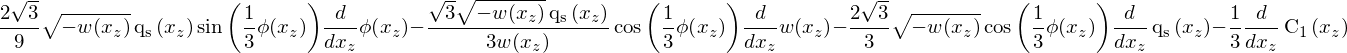

In [89]:
diff(f_1, x_z)

### $\frac{d^2}{dx_z^2} \left(  f_1\right)$

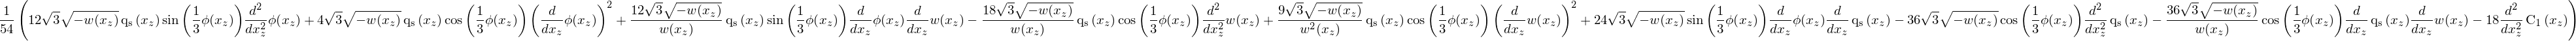

In [90]:
diff(f_1, x_z, x_z)

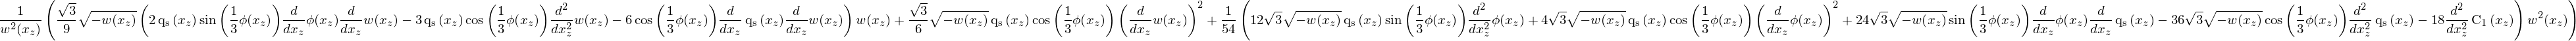

In [91]:
diff(f_1, x_z, x_z).simplify()

#### $f_2$

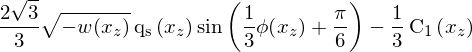

In [92]:
f_2 = - Rational(2) * q_s(x_z) * sqrt(- w(x_z) / Rational(3.0)) * cos(phi(x_z)/Rational(3.0) + 2 * pi /Rational(3.0)) - C_1(x_z)/Rational(3.0)
f_2

### $\frac{d}{dx_z} \left(  f_2\right)$

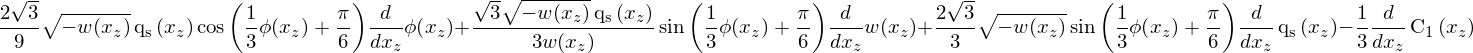

In [95]:
diff(f_2, x_z)

### $\frac{d^2}{dx_z^2} \left(  f_2\right)$

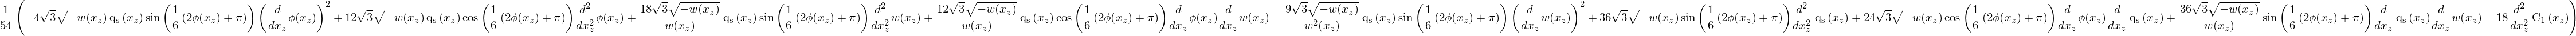

In [93]:
diff(f_2, x_z, x_z)

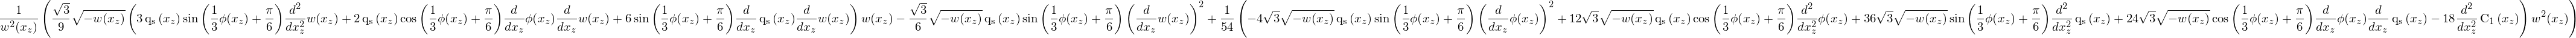

In [94]:
diff(f_2, x_z, x_z).simplify()

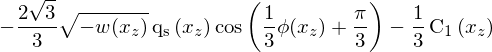

In [97]:
f_3 = Rational(2) * q_s(x_z) * sqrt(- w(x_z) / Rational(3.0)) * cos(phi(x_z)/Rational(3.0) + 4 * pi /Rational(3.0)) - C_1(x_z)/Rational(3.0)
f_3

### $\frac{d}{dx_z} \left(  f_3\right)$

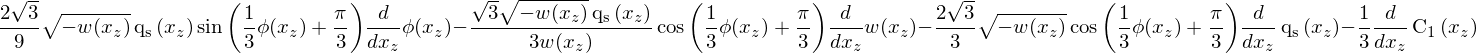

In [98]:
diff(f_3, x_z)

### $\frac{d^2}{dx_z^2} \left(  f_3\right)$

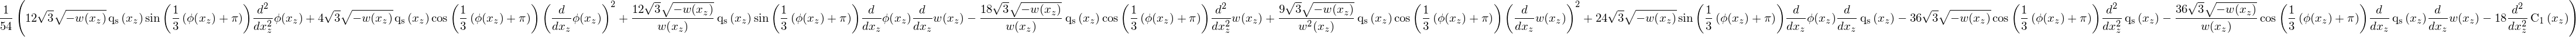

In [99]:
diff(f_3, x_z, x_z)

### Sub Functionals

### $\frac{d}{dx_z} \left(  q_s\right)$

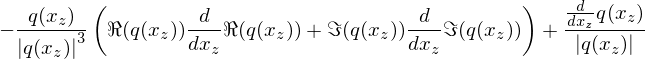

In [142]:
diff(q(x_z)/abs(q(x_z)), x_z)

### $\frac{d^2}{dx_z^2} \left(  q_s\right)$

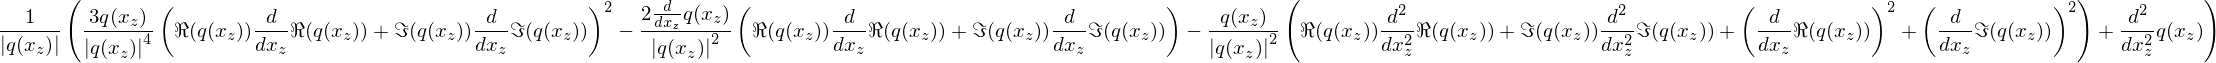

In [143]:
diff(q(x_z)/abs(q(x_z)), x_z, x_z)

### $\frac{d}{dx_z} \left(  \phi \right)$

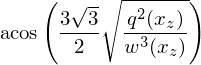

In [147]:
phi_func = acos(sqrt(( ((q(x_z)/Rational(2.0))**2)/(w(x_z)/Rational(3.0))**3) ))
phi_func

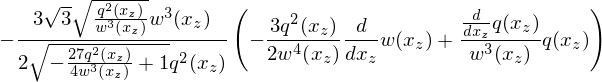

In [148]:
diff(phi_func, x_z)

### $\frac{d^2}{dx_z^2} \left(  \phi \right)$

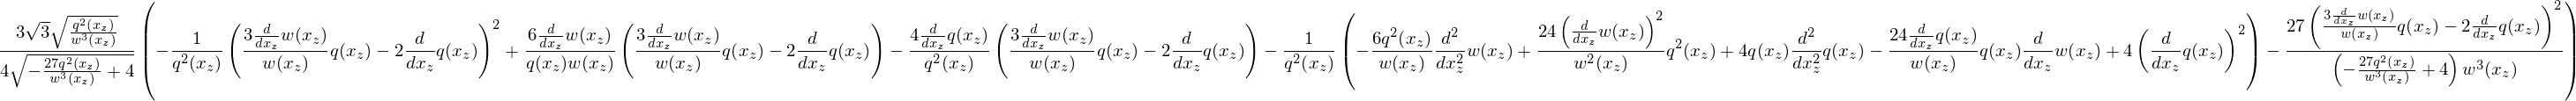

In [149]:
diff(phi_func, x_z, x_z)

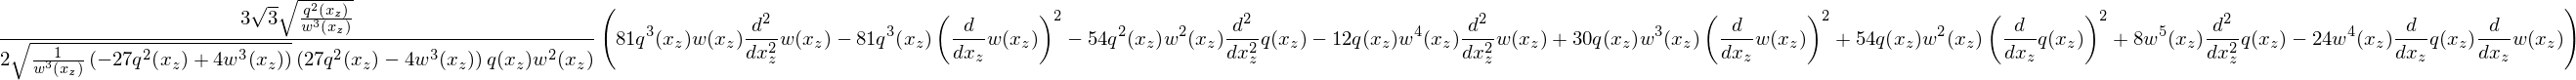

In [150]:
diff(phi_func, x_z, x_z).simplify()

### $\frac{d}{dx_z} \left(  q\right)$

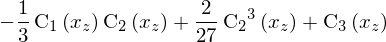

In [152]:
q_func = (Rational(27) * C_3(x_z) - Rational(9) * C_1(x_z) * C_2(x_z) + Rational(2) * (C_2(x_z))**3) / Rational(27)
q_func

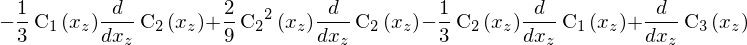

In [153]:
diff(q_func, x_z)

### $\frac{d^2}{dx_z^2} \left(  q \right)$

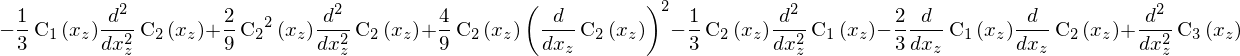

In [154]:
diff(q_func, x_z, x_z)

### $\frac{d}{dx_z} \left(  C_1 \right)$

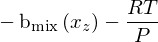

In [155]:
C_1_func = - ( (R * T / P) + b_mix(x_z))
C_1_func

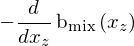

In [157]:
diff(C_1_func, x_z)

### $\frac{d^2}{dx_z^2} \left(  C_1 \right)$

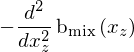

In [159]:
diff(C_1_func, x_z, x_z) # NOTE: This is == 0

### $\frac{d}{dx_z} \left(  C_2 \right)$

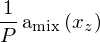

In [160]:
C_2_func = a_mix(x_z) / P
C_2_func

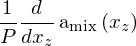

In [161]:
diff(C_2_func, x_z)

### $\frac{d^2}{dx_z^2} \left(  C_2 \right)$

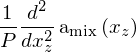

In [162]:
diff(C_2_func, x_z, x_z)

### $\frac{d}{dx_z} \left(  C_3 \right)$

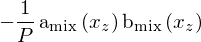

In [165]:
C_3_func = - (a_mix(x_z) * b_mix(x_z)) / P
C_3_func

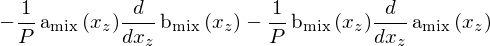

In [166]:
diff(C_3_func, x_z)

### $\frac{d^2}{dx_z^2} \left(  C_3 \right)$

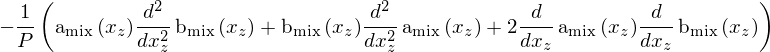

In [167]:
diff(C_3_func, x_z, x_z)